# Q3: Conduct a customer lifetime value prediction for an insurance company.

* Student ID: p233340 
* Name: Kwok Tsz Yi
* Course: COM6101

In [36]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import dataset
df = pd.read_csv('Q3.csv')
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1.0,5.0,5790.0,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0.0,8.0,5080.0,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1.0,8.0,2599.0,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0.0,7.0,0.0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1.0,6.0,3508.0,More than 1,A,Gold,59736.0


Find the shape of the data, the data types of the columns, and the first few rows of the data.

In [37]:
df.shape

(9954, 12)

In [38]:
df.dtypes

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

### Handling the missing values

In [39]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            1
marital_status    1
vintage           1
claim_amount      1
num_policies      1
policy            1
type_of_policy    1
cltv              2
dtype: int64

As the number of missing values is small, we can drop the rows with missing values.

In [40]:
df = df.dropna()
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [41]:
# drop the column 'id' as this is not useful for the analysis
df = df.drop(['id'], axis=1)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation with CLTV \n')

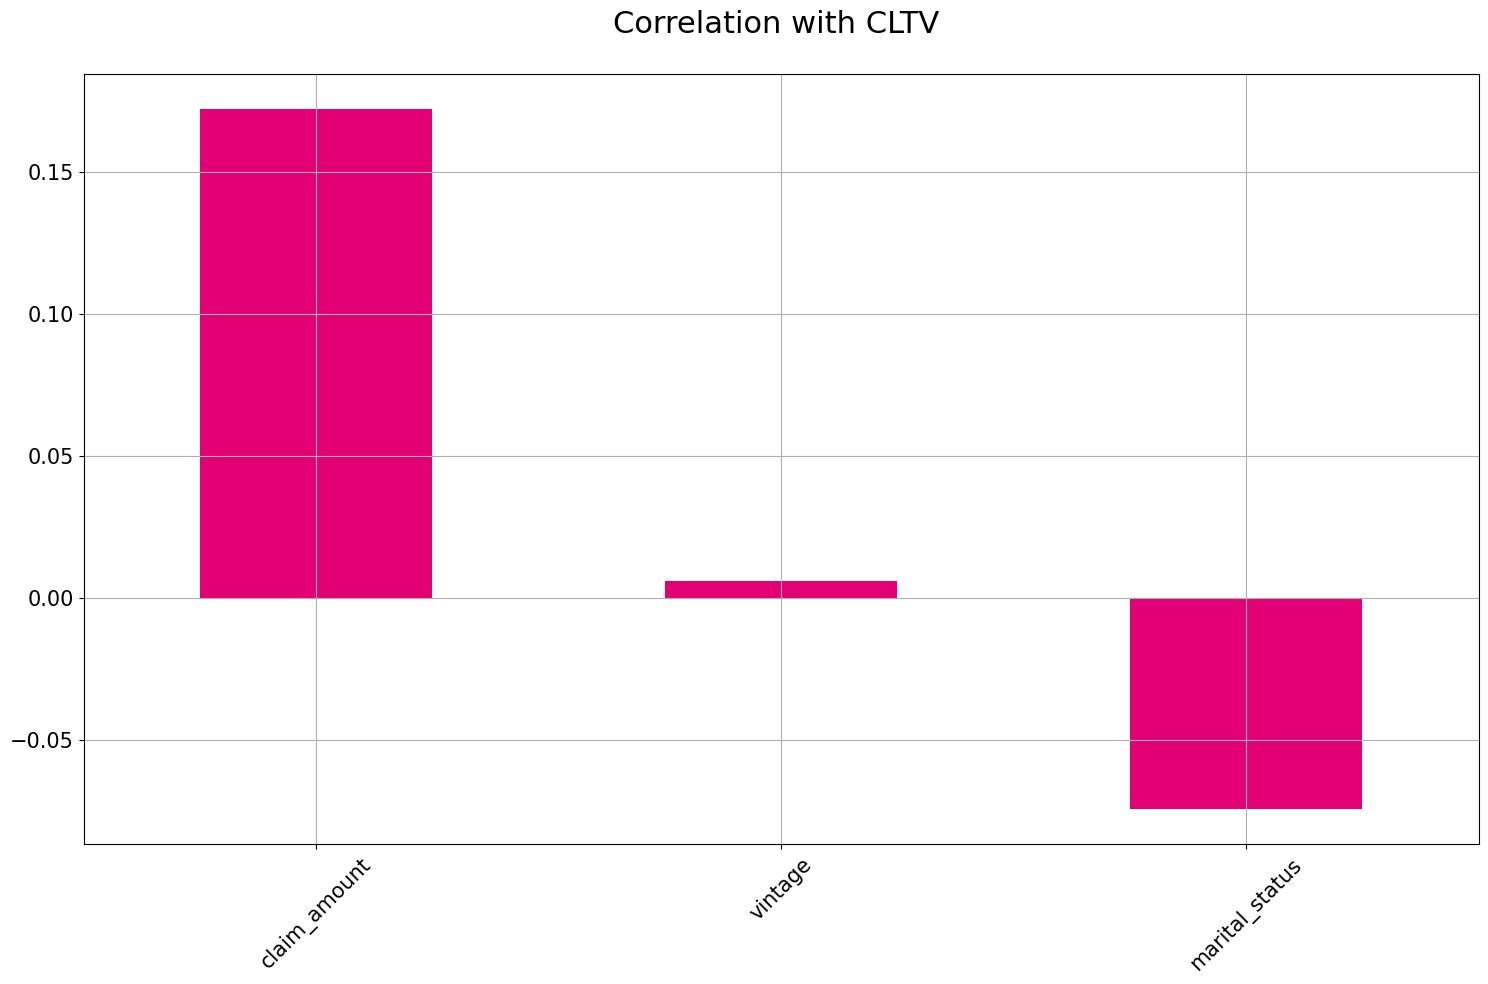

In [42]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

## Data Preprocessing

In [43]:
df.dtypes

gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

As per the dtype, there are 6 columns need to be transformed to numerical data type. For column gender, area, policy and qualification, as they are non-ordinal categorical data, we can use one-hot encoding to transform them. For column income, num_policies and type_of_policy, as they are ordinal categorical data, we can use label encoding to transform them.

#### One-hot encoding

Columns to perform one-hot encoding:
* gender
* area
* policy
* qualification

In [44]:
# replace df['gender'] with dummy variables
df = df.join(pd.get_dummies(df['gender']))
df = df.join(pd.get_dummies(df['area']))
df = df.join(pd.get_dummies(df['policy']))
df = df.join(pd.get_dummies(df['qualification']))
df = df.drop(['gender', 'area', 'policy', 'qualification'], axis=1)
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,False,True,False,True,True,False,False,False,True,False,False
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,False,True,True,False,True,False,False,False,False,True,False
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,False,True,False,True,True,False,False,False,True,False,False
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,True,False,True,False,True,False,False,False,False,True,False
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,False,True,False,True,True,False,False,False,False,True,False


In [45]:
# transform boolean to int
for i in range(0, len(df.columns)):
    if df.iloc[:, i].dtype == bool:
        df.iloc[:, i] = df.iloc[:, i].astype(int)
df.dtypes

income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
type_of_policy     object
cltv              float64
Female              int32
Male                int32
Rural               int32
Urban               int32
A                   int32
B                   int32
C                   int32
D                   int32
Bachelor            int32
High School         int32
Others              int32
dtype: object

In [46]:
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,0,1,0,1,1,0,0,0,1,0,0
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,0,1,1,0,1,0,0,0,0,1,0
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,0,1,0,1,1,0,0,0,1,0,0
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,1,0,1,0,1,0,0,0,0,1,0
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,0,1,0,1,1,0,0,0,0,1,0


#### Ordinal encoding

In [47]:
# transform type_of_policy to numeric
# display value_counts
df['type_of_policy'].value_counts()

type_of_policy
Platinum    5395
Gold        2285
Silver      2272
Name: count, dtype: int64

In [48]:
# silver = 0, gold = 1, platinum = 2
df['type_of_policy'] = df['type_of_policy'].map({'Silver': 0, 'Gold': 1, 'Platinum': 2})
df['type_of_policy'].value_counts()

type_of_policy
2    5395
1    2285
0    2272
Name: count, dtype: int64

In [49]:
# transform num_policies to numeric 
# display value_counts
df['num_policies'].value_counts()

num_policies
More than 1    6719
1              3233
Name: count, dtype: int64

In [50]:
# map more than 1 policy to 1, 1 policy to 0
df['num_policies'] = df['num_policies'].map({'1': 0, 'More than 1':1})
df['num_policies'].value_counts()

num_policies
1    6719
0    3233
Name: count, dtype: int64

In [51]:
# transform income column to numeric
# discover unique values in income column first
df['income'].value_counts()

income
5L-10L           5797
2L-5L            2417
More than 10L    1507
<=2L              231
Name: count, dtype: int64

Encoding the df['income'] column to numerical data type, e.g. '<=2L' to 1, '2L-5L' to 2.

In [52]:
# encode income column
df['income'] = df['income'].map({'<=2L': 0, '2L-5L': 1, '5L-10L': 2, 'More than 10L': 3})
df['income'].value_counts()

income
2    5797
1    2417
3    1507
0     231
Name: count, dtype: int64

In [53]:
# rearrange columns: cltv to the end
cols = list(df.columns)
cols.remove('cltv')
cols.append('cltv')
df = df[cols]
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others,cltv
0,2,1.0,5.0,5790.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64308.0
1,2,0.0,8.0,5080.0,1,2,0,1,1,0,1,0,0,0,0,1,0,515400.0
2,2,1.0,8.0,2599.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64212.0
3,2,0.0,7.0,0.0,1,2,1,0,1,0,1,0,0,0,0,1,0,97920.0
4,3,1.0,6.0,3508.0,1,1,0,1,0,1,1,0,0,0,0,1,0,59736.0


### Outlier detection and removal:

We can use the z score to detect the outliers. If the z score is greater than 3, we can remove the outliers, as per the normal distribution, 99.7% of the data should be within 3 standard deviations from the mean.

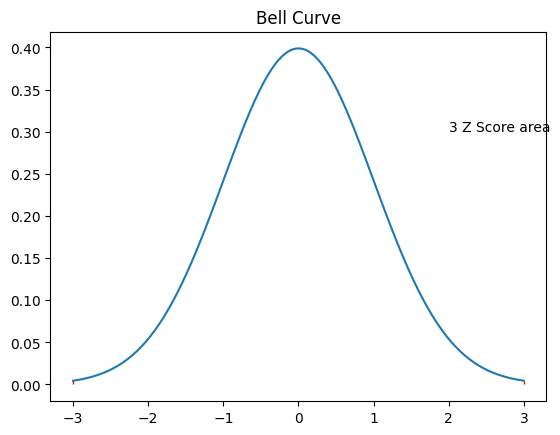

In [54]:
# use a bell curve to visualize the concept of 3 z score of normal distribution
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# red area as abs z score > 3
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where = abs(x) >= 3, color = 'red')
# label the red area
plt.text(2, 0.3, '3 Z Score area', fontsize = 10)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Bell Curve')
plt.show()

In [55]:
# remove outliers in which z > 3
from scipy.stats import zscore
z = np.abs(zscore(df))
# threshold = 3
threshold = 3
df = df[(z < 3).all(axis=1)]
df.shape

(8367, 18)

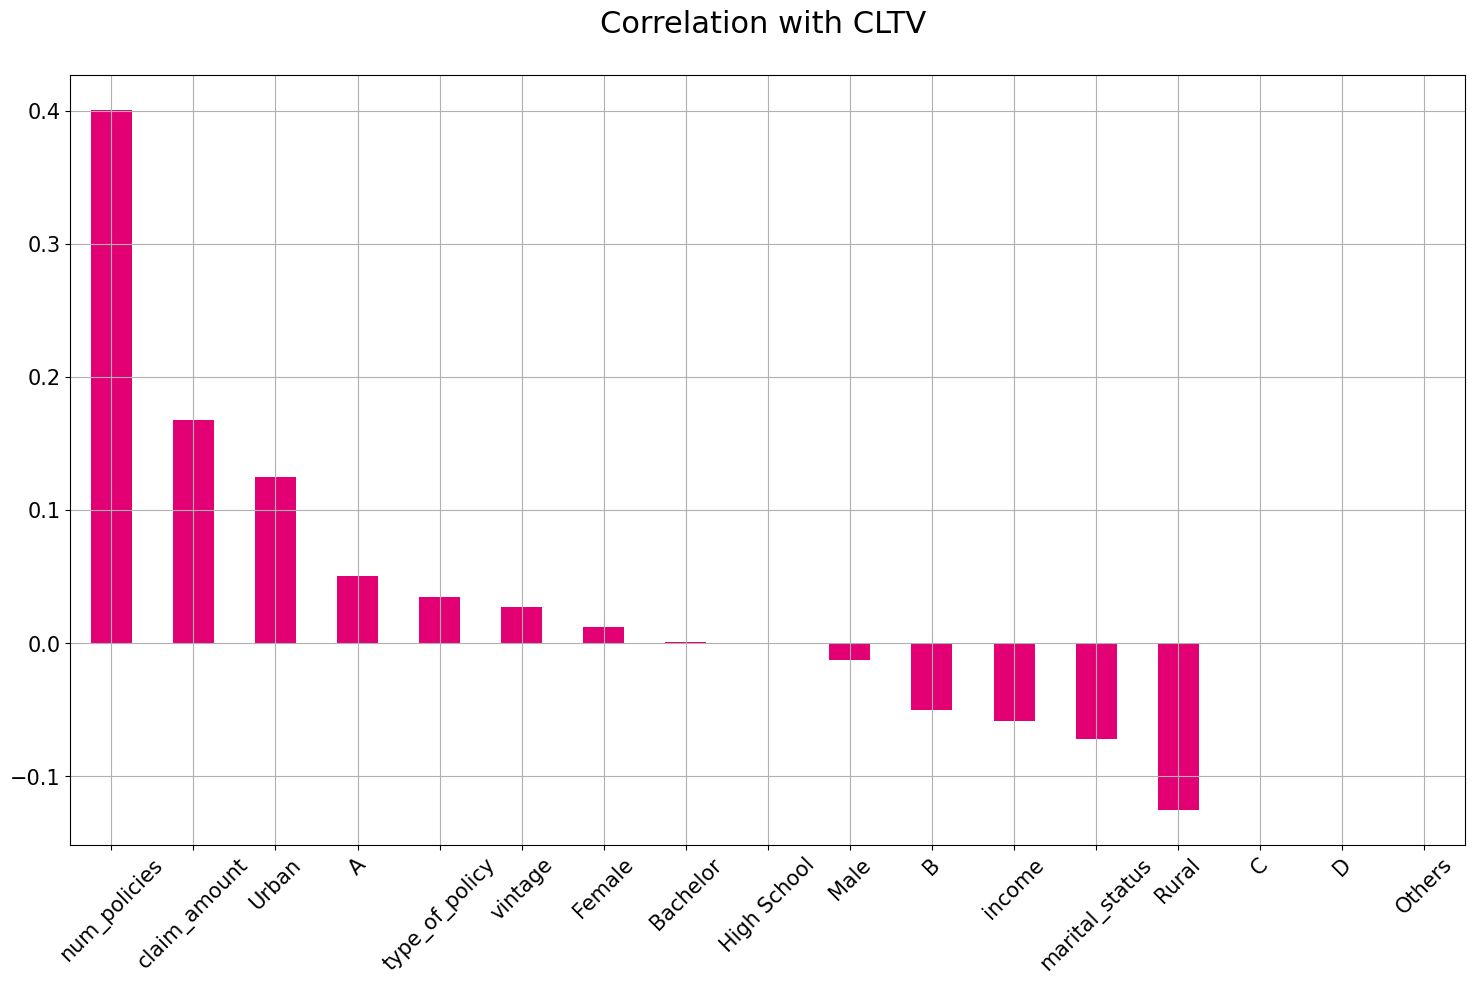

In [56]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

As per the correlation analysis of numerical columns, column 'Bachelor', 'High School', 'C', 'D' and 'Others' have nearly no correlation with the target column 'cltv'. We can consider to remove these columns from generating the linear regression model of predicting the cltv.

In [57]:
df = df.drop(['Bachelor', 'High School', 'C', 'D', 'Others'], axis = 1)

In [58]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

calculate_vif(df.iloc[:, :-1])

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,Variable Inflation Factors
0,income,1.102359
1,marital_status,1.026743
2,vintage,1.012656
3,claim_amount,1.381137
4,num_policies,1.038719
5,type_of_policy,1.013380
6,Female,inf
7,Male,inf
8,Rural,inf
9,Urban,inf


As per the multicollearity analysis of numerical columns, column 'Rural' & 'Urban', 'A' & 'B'. 'Female' & 'Male' have high correlation. We can consider to remove one of the columns from each pair to avoid multicollinearity.

In [59]:
df = df.drop(['Rural', 'A', 'Female'], axis = 1)

In [60]:
calculate_vif(df.iloc[:, :-1])

,variables,Variable Inflation Factors
0,income,5.523061
1,marital_status,2.283525
2,vintage,4.615478
3,claim_amount,3.961098
4,num_policies,3.050275
5,type_of_policy,3.425268
6,Male,2.242019
7,Urban,4.112689
8,B,1.461299


## Predict customer lifetime value via linear regression model

In [61]:
# split data into train and test, exclude column id from feature attributes
# cltv is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X, y

(      income  marital_status  vintage  claim_amount  num_policies  \
 0          2             1.0      5.0        5790.0             1   
 2          2             1.0      8.0        2599.0             1   
 3          2             0.0      7.0           0.0             1   
 4          3             1.0      6.0        3508.0             1   
 6          2             1.0      6.0           0.0             1   
 ...      ...             ...      ...           ...           ...   
 9946       2             0.0      7.0        7139.0             0   
 9947       2             1.0      5.0           0.0             0   
 9948       2             0.0      7.0        4938.0             1   
 9951       1             1.0      1.0        5407.0             1   
 9952       2             1.0      6.0           0.0             0   
 
       type_of_policy  Male  Urban  B  
 0                  2     1      1  0  
 2                  2     1      1  0  
 3                  2     0      0  0 

In [62]:
# split data into train and test, test size = 0.3, random_state = 40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

LinearRegression()

In [63]:
# find the coefficients of the model
coef = pd.DataFrame(list(zip(X, model.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,income,-1945.576183
1,marital_status,-4738.333930
2,vintage,84.113094
3,claim_amount,2.129160
4,num_policies,51042.759301
5,type_of_policy,1167.081900
6,Male,-17.420074
7,Urban,4103.511769
8,B,-3850.610187


In [64]:
#MSE and R2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mse_insample = mean_squared_error(y_train, model.predict(X_train))
mse_outsample = mean_squared_error(y_test, y_pred)
r2_insample = r2_score(y_train, model.predict(X_train))
r2_outsample = r2_score(y_test, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.9683766
R2 in-sample: 0.177452007563367
R2 out-sample: 0.17569013427933222


C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Text(0.5, 1.0, 'Actual vs Predicted')

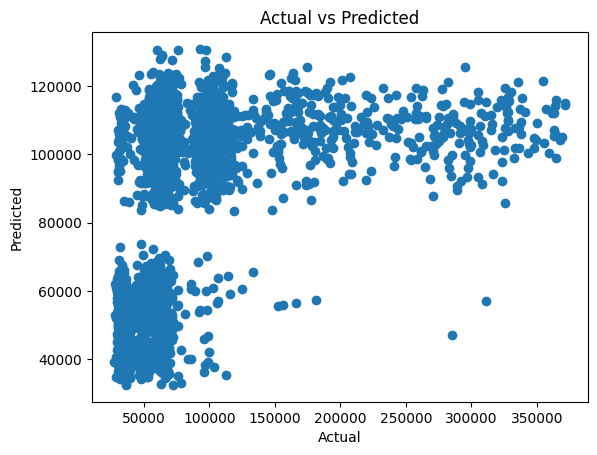

In [65]:
# plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

As some features attributes having a higher value than others, we need to scale the features. Let's try using min-max scaling, standard scaling and robust scaling to see which scaling method is the best.

## Scale the features before training the model

#### Min-max scaling

In [66]:
# min-max scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(df.iloc[:, :-1])

# split the min-max scaled data into train and test
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.3, random_state=40)
X_minmax, y

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

(array([[0.66666667, 1.        , 0.66666667, ..., 1.        , 1.        ,
         0.        ],
        [0.66666667, 1.        , 1.        , ..., 1.        , 1.        ,
         0.        ],
        [0.66666667, 0.        , 0.88888889, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.66666667, 0.        , 0.88888889, ..., 1.        , 1.        ,
         0.        ],
        [0.33333333, 1.        , 0.22222222, ..., 0.        , 1.        ,
         0.        ],
        [0.66666667, 1.        , 0.77777778, ..., 1.        , 1.        ,
         0.        ]]),
 0        64308.0
 2        64212.0
 3        97920.0
 4        59736.0
 6       238920.0
           ...   
 9946     51360.0
 9947     31272.0
 9948     61116.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 8367, dtype: float64)

In [67]:
# train a linear regression model on scaled data
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

# find the coefficients of the model after min-max scaling
coef_scale_minmax = pd.DataFrame(list(zip(X, model_minmax.coef_)))
coef_scale_minmax.columns = ['feature', 'coef']
coef_scale_minmax

,feature,coef
0,income,-5836.728548
1,marital_status,-4738.333930
2,vintage,757.017849
3,claim_amount,30055.229365
4,num_policies,51042.759301
5,type_of_policy,2334.163800
6,Male,-17.420074
7,Urban,4103.511769
8,B,-3850.610187


In [68]:
# check the MSE and R2 of the model on min-max scaled data
y_pred = model_minmax.predict(X_test_minmax)
mse_insample = mean_squared_error(y_train_minmax, model_minmax.predict(X_train_minmax))
mse_outsample = mean_squared_error(y_test_minmax, y_pred)
r2_insample = r2_score(y_train_minmax, model_minmax.predict(X_train_minmax))
r2_outsample = r2_score(y_test_minmax, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.968386
R2 in-sample: 0.177452007563367
R2 out-sample: 0.1756901342793301


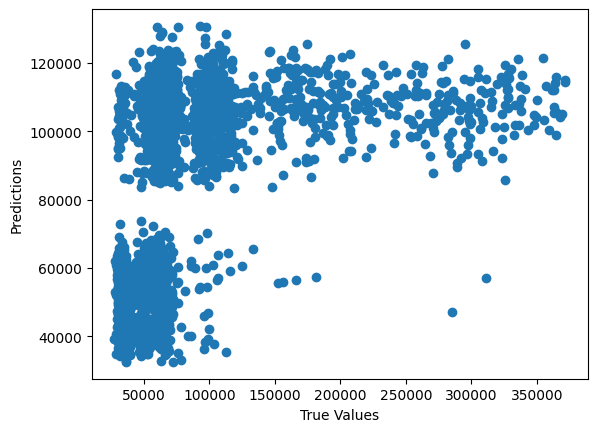

In [69]:
# fitted line plot for model generated from min-max scaled data
import matplotlib.pyplot as plt
plt.scatter(y_test_minmax, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Standard scaling

In [70]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(df.iloc[:, :-1])

# split the standardized data into train and test
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size=0.3, random_state=40)
X_standard, y

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

(array([[ 0.18430959,  0.84572581,  0.13978327, ...,  0.88436906,
          0.66433701, -0.65948224],
        [ 0.18430959,  0.84572581,  1.46532152, ...,  0.88436906,
          0.66433701, -0.65948224],
        [ 0.18430959, -1.18241631,  1.02347544, ..., -1.13074965,
         -1.5052601 , -0.65948224],
        ...,
        [ 0.18430959, -1.18241631,  1.02347544, ...,  0.88436906,
          0.66433701, -0.65948224],
        [-1.2815824 ,  0.84572581, -1.62760107, ..., -1.13074965,
          0.66433701, -0.65948224],
        [ 0.18430959,  0.84572581,  0.58162935, ...,  0.88436906,
          0.66433701, -0.65948224]]),
 0        64308.0
 2        64212.0
 3        97920.0
 4        59736.0
 6       238920.0
           ...   
 9946     51360.0
 9947     31272.0
 9948     61116.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 8367, dtype: float64)

In [71]:
# train a linear regression model on standardized data
model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train_standard)

# find the coefficients of the model after standardization
coef_scale_standard = pd.DataFrame(list(zip(X, model_standard.coef_)))
coef_scale_standard.columns = ['feature', 'coef']
coef_scale_standard

,feature,coef
0,income,-1327.230237
1,marital_status,-2336.292839
2,vintage,190.367409
3,claim_amount,6139.085826
4,num_policies,23915.622958
5,type_of_policy,950.407490
6,Male,-8.644689
7,Urban,1891.370405
8,B,-1769.725594


In [72]:
# check the MSE and R2 of the model on standardized data
y_pred = model_standard.predict(X_test_standard)
mse_insample = mean_squared_error(y_train_standard, model_standard.predict(X_train_standard))
mse_outsample = mean_squared_error(y_test_standard, y_pred)
r2_insample = r2_score(y_train_standard, model_standard.predict(X_train_standard))
r2_outsample = r2_score(y_test_standard, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.9683843
R2 in-sample: 0.177452007563367
R2 out-sample: 0.17569013427933045


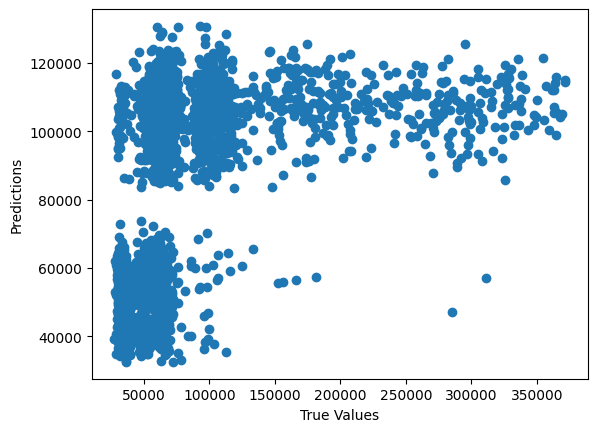

In [73]:
# fitted line plot
plt.scatter(y_test_standard, y_pred)
# plot the model coefficients
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Robust scaling

In [74]:
# robust scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_robust = scaler.fit_transform(df.iloc[:, :-1])

# split the robust scaled data into train and test
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_robust, y, test_size=0.3, random_state=40)
X_robust, y

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -1.        ,  0.66666667, ..., -1.        ,
         -1.        ,  0.        ],
        ...,
        [ 0.        , -1.        ,  0.66666667, ...,  0.        ,
          0.        ,  0.        ],
        [-1.        ,  0.        , -1.33333333, ..., -1.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33333333, ...,  0.        ,
          0.        ,  0.        ]]),
 0        64308.0
 2        64212.0
 3        97920.0
 4        59736.0
 6       238920.0
           ...   
 9946     51360.0
 9947     31272.0
 9948     61116.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 8367, dtype: float64)

In [75]:
# train a linear regression model on robust scaled data
model_robust = LinearRegression()
model_robust.fit(X_train_robust, y_train_robust)

# find the coefficients of the model after robust scaling
coef_scale_robust = pd.DataFrame(list(zip(X, model_robust.coef_)))
coef_scale_robust.columns = ['feature', 'coef']
coef_scale_robust

,feature,coef
0,income,-1945.576183
1,marital_status,-4738.333930
2,vintage,252.339283
3,claim_amount,7663.913155
4,num_policies,51042.759301
5,type_of_policy,1167.081900
6,Male,-17.420074
7,Urban,4103.511769
8,B,-3850.610187


In [76]:
# check the MSE and R2 of the model on robust scaled data
y_pred = model_robust.predict(X_test_robust)
mse_insample = mean_squared_error(y_train_robust, model_robust.predict(X_train_robust))
mse_outsample = mean_squared_error(y_test_robust, y_pred)
r2_insample = r2_score(y_train_robust, model_robust.predict(X_train_robust))
r2_outsample = r2_score(y_test_robust, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.9683843
R2 in-sample: 0.177452007563367
R2 out-sample: 0.17569013427933045


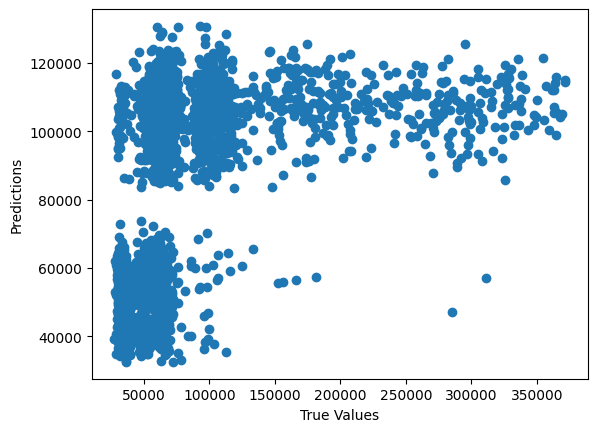

In [77]:
# fitted line plot
plt.scatter(y_test_robust, y_pred)
# plot the model coefficients
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## Model evaluation

By using the mean squared error, we can compare the model performance of different scaling methods, and model without scaling.

Model performance without scaling:
* MSE in-sample: 3316216289.8726454
* MSE out-sample: 3735366623.9683766
* R2 in-sample: 0.177452007563367
* R2 out-sample: 0.17569013427933222

Model performance with min-max scaling:
* MSE in-sample: 3316216289.8726454
* MSE out-sample: 3735366623.968386
* R2 in-sample: 0.177452007563367
* R2 out-sample: 0.1756901342793301

Model performance with standard scaling:
* MSE in-sample: 3383043639.2027183
* MSE out-sample: 3674455879.3301353
* R2 in-sample: 0.17643729753251414
* R2 out-sample: 0.17926607540989514

Model performance with robust scaling:
* MSE in-sample: 3383043639.2027187
* MSE out-sample: 3674455879.3301363
* R2 in-sample: 0.17643729753251391
* R2 out-sample: 0.17926607540989492